In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
%matplotlib inline

In [32]:
titanic_train = pd.read_csv("../data/titanic/train.csv")
titanic_test = pd.read_csv("../data/titanic/test.csv")

In [33]:
titanic_train.shape

(891, 12)

In [34]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
titanic_train = titanic_train.drop(columns=['Embarked', 'PassengerId', 'Ticket'])
titanic_test = titanic_test.drop(columns=['Embarked', 'PassengerId', 'Ticket'])

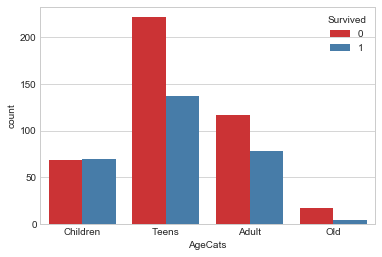

In [37]:
def AgeCategorize(dataframe):
    interval = (0,18,35,60,120)
    categories = ['Children','Teens','Adult', 'Old']
    dataframe['AgeCats'] = pd.cut(dataframe.Age, interval, labels = categories)
    return dataframe
titanic_train = AgeCategorize(titanic_train)

ax = sns.countplot(x = 'AgeCats',  data = titanic_train, hue = 'Survived', palette = 'Set1')

plt.show()

In [38]:
def GenerateFamilyColumn(dataframe):
    dataframe["Family"] = dataframe["SibSp"] + dataframe["Parch"]
    return dataframe
titanic_train = GenerateFamilyColumn(titanic_train)
titanic_test = GenerateFamilyColumn(titanic_test)
print(titanic_train["Family"].value_counts())

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64


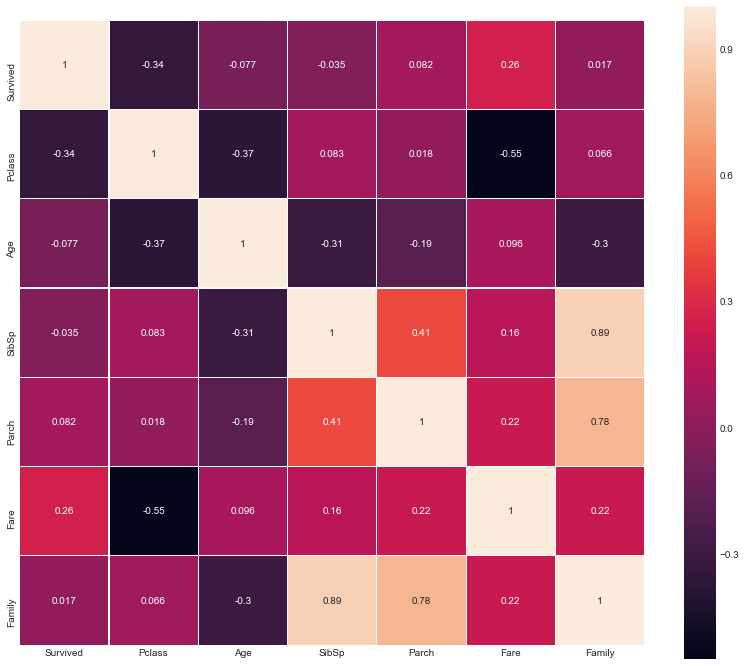

In [39]:
plt.figure(figsize=(14,12))
sns.heatmap(titanic_train.corr(),linewidths=0.1,square=True,  linecolor='white', annot=True)

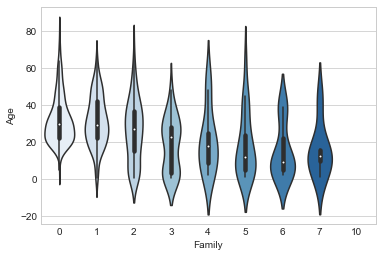

In [40]:
sns.violinplot(x='Family',y='Age',data=titanic_train, palette="Blues")

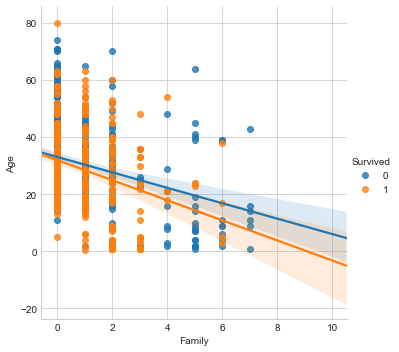

In [41]:
sns.lmplot(x='Family',y='Age',hue='Survived',data=titanic_train)

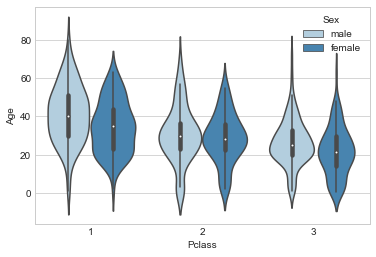

In [42]:
sns.violinplot(x='Pclass',y='Age',hue='Sex',data=titanic_train, palette="Blues")

In [43]:
def FillAgeByPclass(dataframe):
    median_value = dataframe.groupby('Pclass')['Age'].median()
    for pclass in  dataframe.Pclass.unique():
        dataframe.loc[dataframe.Pclass==pclass, 'Age'] = dataframe.loc[dataframe.Pclass==pclass, 'Age'].fillna(int(median_value[pclass]))
    dataframe.Age = dataframe.Age.astype(int)
    return dataframe

In [44]:
titanic_test[titanic_test.Fare.isnull()].head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Family
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,0


In [45]:
median_value = titanic_test.loc[titanic_train.Pclass==3, 'Fare'].median()
print(median_value)
titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'] = titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'].fillna(median_value)

14.5


In [46]:
titanic_train = FillAgeByPclass(titanic_train)
titanic_train = AgeCategorize(titanic_train)

titanic_test = FillAgeByPclass(titanic_test)
titanic_test = AgeCategorize(titanic_test)

https://upload.wikimedia.org/wikipedia/commons/5/5d/Titanic_side_plan_annotated_English.png

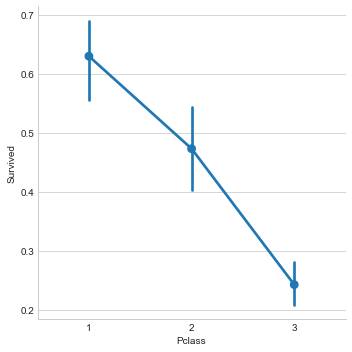

In [47]:
sns.factorplot('Pclass', 'Survived', data=titanic_train, size=5)

In [48]:
def ProcessCabin(dataframe):
    dataframe['Cabin'] = dataframe['Cabin'].fillna('Z')
    dataframe['top_cabin'] = dataframe['Cabin'].astype(str).str[0]
    
    dataframe.drop(['Cabin'], axis=1, inplace=True)
    dataframe['top_cabin'] = dataframe['top_cabin'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 
                                              'E' : 5, 'F' : 6, 'G' : 7, 'Z' : 8, 'T' : 9})
    return dataframe
def ProcessSex(dataframe):
    dataframe['Sex'] = dataframe['Sex'].map({'male' : 1, 'female' : 0})
    return dataframe
def ProcessName(dataframe):
    dataframe["Name_len"] = dataframe["Name"].apply(lambda x: len(x))
    dataframe.drop(['Name'], axis=1, inplace=True)
    return dataframe
def ProcessPcalss(dataframe):
    class_dummies = pd.get_dummies(dataframe['Pclass'])
    class_dummies.columns = ['Class_1', 'Class_2', 'Class_3']
    class_dummies.drop(['Class_3'], axis=1, inplace=True)
    dataframe.drop(['Pclass'], axis=1, inplace=True)

    dataframe = dataframe.join(class_dummies)
    return dataframe

In [49]:
titanic_train = ProcessCabin(titanic_train)
titanic_train = ProcessSex(titanic_train)
titanic_train = ProcessName(titanic_train)
titanic_train = ProcessPcalss(titanic_train)

titanic_test = ProcessCabin(titanic_test)
titanic_test = ProcessSex(titanic_test)
titanic_test = ProcessName(titanic_test)
titanic_test = ProcessPcalss(titanic_test)

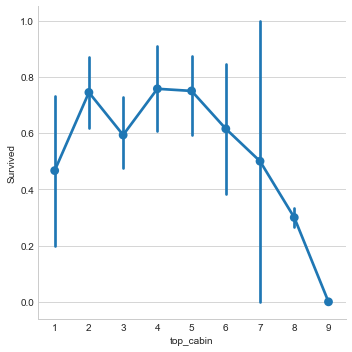

In [50]:
sns.factorplot('top_cabin', 'Survived', data=titanic_train, size=5)

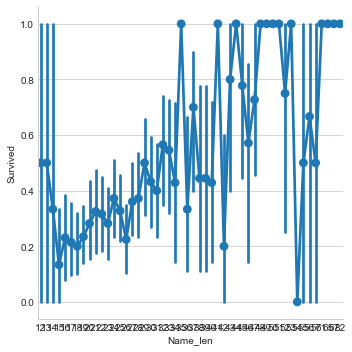

In [51]:
sns.factorplot('Name_len', 'Survived', data=titanic_train, size=5)

In [53]:
titanic_train = titanic_train.drop(columns=['AgeCats', 'SibSp', 'Parch'])
titanic_test = titanic_test.drop(columns=['AgeCats', 'SibSp', 'Parch'])

titanic_train.head(5)

,Survived,Sex,Age,Fare,Family,top_cabin,Name_len,Class_1,Class_2
0,0,1,22,7.2500,1,8,23,0,0
1,1,0,38,71.2833,1,3,51,1,0
2,1,0,26,7.9250,0,8,22,0,0
3,1,0,35,53.1000,1,3,44,1,0
4,0,1,35,8.0500,0,8,24,0,0


In [54]:
titanic_test.head(5)

,Sex,Age,Fare,Family,top_cabin,Name_len,Class_1,Class_2
0,1,34,7.8292,0,8,16,0,0
1,0,47,7.0000,1,8,32,0,0
2,1,62,9.6875,0,8,25,0,1
3,1,27,8.6625,0,8,16,0,0
4,0,22,12.2875,2,8,44,0,0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
def Normalizer(dataframe, Columns):
    for feature_name in Columns:
        max_value = dataframe[feature_name].max()
        min_value = dataframe[feature_name].min()
        dataframe[feature_name] = (dataframe[feature_name] - min_value) / (max_value - min_value)
    return dataframe

In [59]:
titanic_train = Normalizer(titanic_train, ['Age', 'Fare', 'Family', 'top_cabin', 'Name_len'])
titanic_test = Normalizer(titanic_test, ['Age', 'Fare', 'Family', 'top_cabin', 'Name_len'])

In [61]:
titanic_test_copy = pd.read_csv("../data/titanic/test.csv")

In [63]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test = titanic_test

In [64]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

Submission = pd.DataFrame({"PassengerId":titanic_test_copy["PassengerId"], "Survived": Y_pred })
Submission.to_csv('titanic_LogisticRegression.csv', index=False)

In [65]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

Submission = pd.DataFrame({"PassengerId":titanic_test_copy["PassengerId"], "Survived": Y_pred })
Submission.to_csv('titanic_SVC.csv', index=False)

78.68


In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

Submission = pd.DataFrame({"PassengerId":titanic_test_copy["PassengerId"], "Survived": Y_pred })
Submission.to_csv('titanic_DT.csv', index=False)

99.66


In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

Submission = pd.DataFrame({"PassengerId":titanic_test_copy["PassengerId"], "Survived": Y_pred })
Submission.to_csv('titanic_RandomForest.csv', index=False)

99.66
